In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv(r"C:\Users\USER-1\Downloads\counterfeit_banknotes_messy.csv")
df

,variance,skewness,kurtosis,entropy,texture,color_density,brightness,print_quality,ink_spread,paper_fiber,counterfeit
0,0.993428,0.253758,1.064722,-3.321481,1.147357,2.191866,96.878301,2.0,0.953272,0.680889,0.0
1,-0.276529,-0.182258,-0.496713,-5.308087,-4.820824,3.547811,93.804831,1.0,-0.759657,0.552368,0.0
2,1.295377,1.734938,0.129260,-1.013424,3.381656,1.385521,101.293274,4.0,0.386413,0.475078,1.0
3,3.046060,0.300129,-1.479693,1.507134,4.699440,1.092703,112.017168,3.0,1.958700,0.330362,1.0
4,-0.468307,1.296916,-0.309847,1.330510,-0.807541,3.120708,105.539796,3.0,-3.140000,0.632166,0.0
...,...,...,...,...,...,...,...,...,...,...,...
999995,0.866009,1.211946,1.046587,-1.774120,0.133689,1.353892,120.761711,4.0,-1.130699,0.649751,1.0
999996,0.203545,-0.150640,-0.230563,1.032039,2.577211,0.609468,115.063712,2.0,0.010474,0.531180,1.0
999997,-0.225959,0.355514,0.011702,-0.293839,-0.759376,0.605950,131.771051,1.0,NaN,0.467475,1.0
999998,2.938285,-0.188734,0.500476,-1.022038,2.268507,0.738190,64.039308,1.0,1.118200,0.642284,1.0


General Information to Understand The Data Architecture.

In [4]:
# Info informs on the data.
df.info()

# Describe gives a summary of the numeric data mean...etc.
df.describe()

# Is null returns a sum total of all the null values in the data.
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   variance       990000 non-null  float64
 1   skewness       990000 non-null  float64
 2   kurtosis       990000 non-null  float64
 3   entropy        990000 non-null  float64
 4   texture        990000 non-null  float64
 5   color_density  990000 non-null  float64
 6   brightness     990000 non-null  float64
 7   print_quality  990000 non-null  float64
 8   ink_spread     990000 non-null  float64
 9   paper_fiber    990000 non-null  float64
 10  counterfeit    990000 non-null  float64
dtypes: float64(11)
memory usage: 83.9 MB


variance         10000
skewness         10000
kurtosis         10000
entropy          10000
texture          10000
color_density    10000
brightness       10000
print_quality    10000
ink_spread       10000
paper_fiber      10000
counterfeit      10000
dtype: int64

Filling the Missing values Using Median .

In [7]:
# Df.median uses the median to fill the missing values.
# This is restricted only to te numeric values.

df.fillna(df.median(numeric_only=True), inplace=True )

Checking whether our dataset has duplicated Information.

In [10]:
df.duplicated().sum() # Returns sum > 0 if there is any duplicated data.
df.duplicated().any()     # Return boolean value of either True or False
df.index.is_unique # Returns values of either true or false

True

Correlation Matrix 

In [13]:
# Uses the list comprehension method.
new_columns = [x for x in df.columns if x not in ['counterfeit']]
Matrix = df[new_columns].corr()
Matrix

,variance,skewness,kurtosis,entropy,texture,color_density,brightness,print_quality,ink_spread,paper_fiber
variance,1.000000,0.000694,-0.000893,0.001138,0.000959,0.001279,0.000149,0.000654,0.000147,-0.000605
skewness,0.000694,1.000000,0.001661,0.000285,0.001037,-0.000678,-0.000618,-0.000360,-0.000905,0.000609
kurtosis,-0.000893,0.001661,1.000000,0.000039,-0.000502,-0.002194,0.000893,-0.000223,-0.001885,0.001082
entropy,0.001138,0.000285,0.000039,1.000000,-0.000501,0.000535,-0.000794,-0.001594,0.001253,-0.000257
texture,0.000959,0.001037,-0.000502,-0.000501,1.000000,0.000623,0.000749,-0.001746,0.000877,0.000650
color_density,0.001279,-0.000678,-0.002194,0.000535,0.000623,1.000000,0.000960,0.000257,0.001026,-0.001419
brightness,0.000149,-0.000618,0.000893,-0.000794,0.000749,0.000960,1.000000,0.001940,-0.000418,0.000688
print_quality,0.000654,-0.000360,-0.000223,-0.001594,-0.001746,0.000257,0.001940,1.000000,-0.001781,-0.000031
ink_spread,0.000147,-0.000905,-0.001885,0.001253,0.000877,0.001026,-0.000418,-0.001781,1.000000,0.001114
paper_fiber,-0.000605,0.000609,0.001082,-0.000257,0.000650,-0.001419,0.000688,-0.000031,0.001114,1.000000


Plotting The Correlation Matrix 

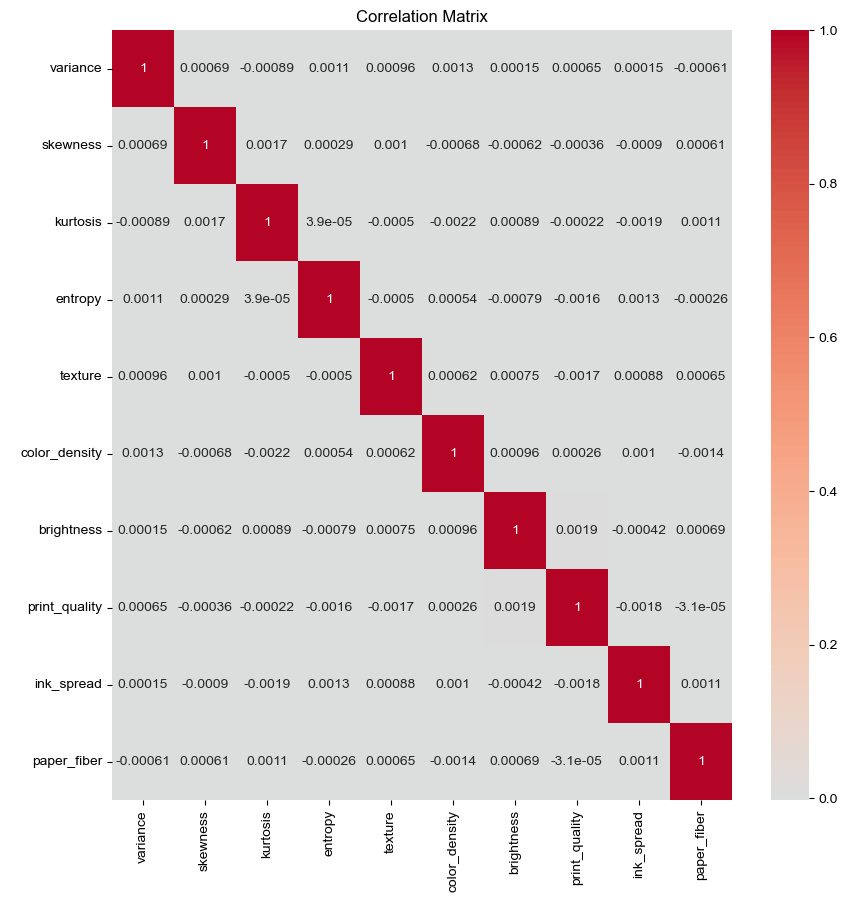

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(Matrix, annot=True, cmap="coolwarm", center=0 )
plt.title("Correlation Matrix")
sns.set_style("darkgrid")
plt.show()

Checking The Distribution of Bank Notes (Counterfeit & Genuine)

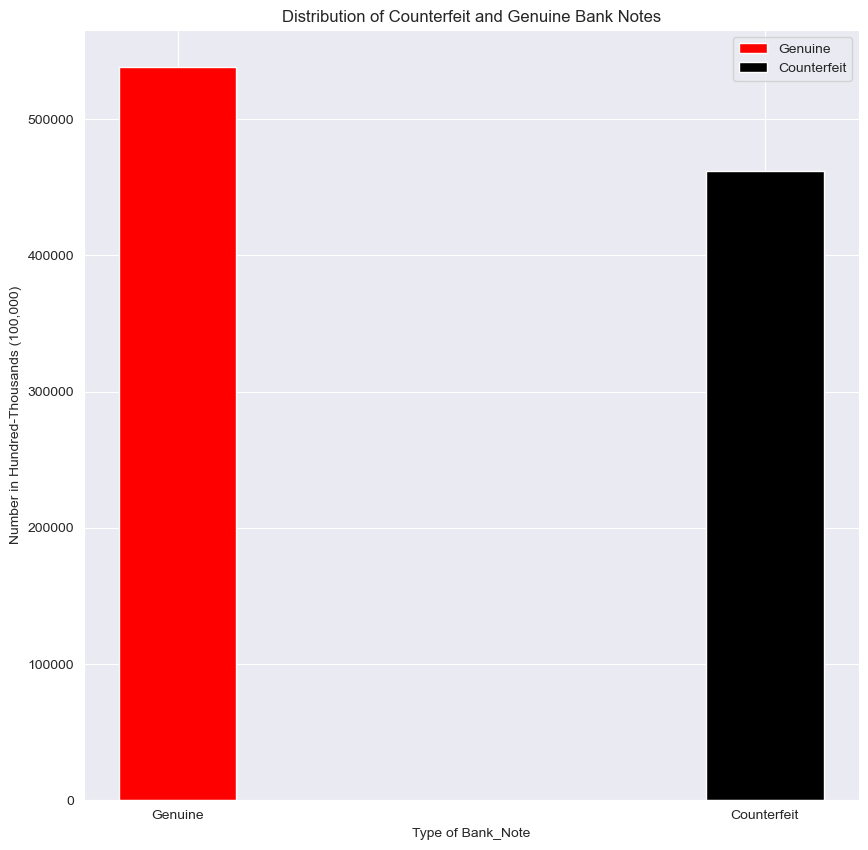

In [20]:
# Value_counts() returns unique values in the counterfeit column in the dataset.
notes = df['counterfeit'].value_counts()
plt.figure(figsize=(10, 10))
plt.bar(['Genuine', 'Counterfeit'], notes, color=['red', 'black'], label = ['Genuine', 'Counterfeit'],width=0.2 )
plt.title("Distribution of Counterfeit and Genuine Bank Notes")
sns.set_style("darkgrid")
plt.xlabel("Type of Bank_Note")
plt.ylabel("Number in Hundred-Thousands (100,000)")
plt.legend()
plt.grid(True)
plt.show()

Oversampling To Increase The Number Of Counterfeit Notes As The Difference Is Quite Big

In [25]:
from imblearn.over_sampling import SMOTE
X = df.drop(columns=['counterfeit'])
Y = df['counterfeit'] # Y is the target variable 

smote = SMOTE()

X_sampled, Y_sampled = smote.fit_resample(X, Y)

Checking for outliers in my data.

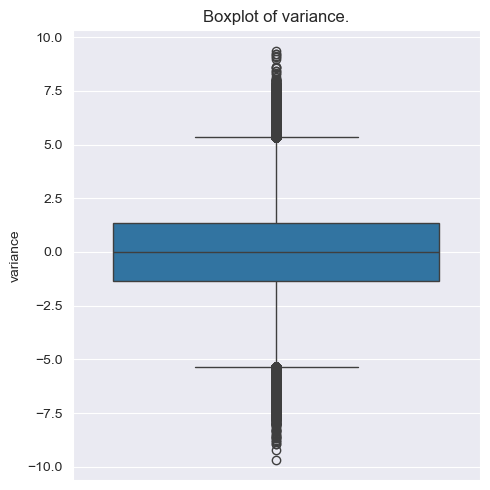

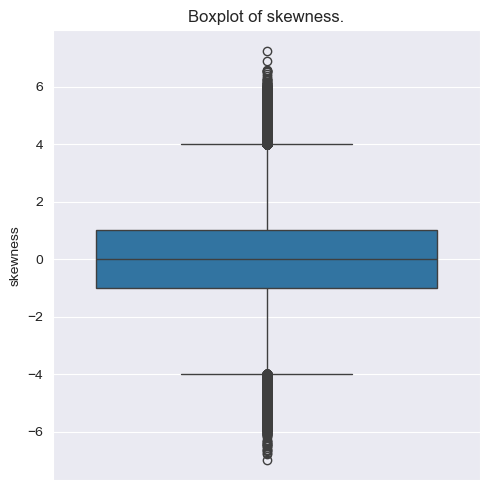

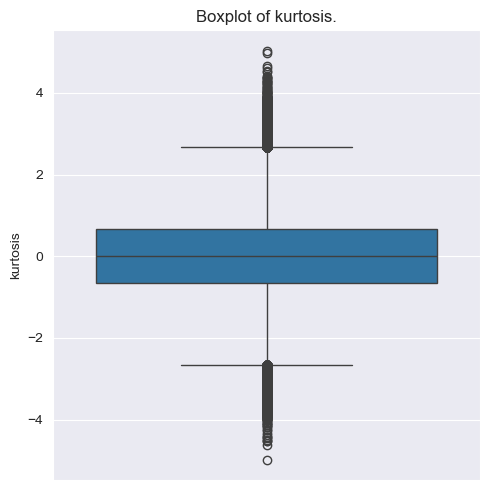

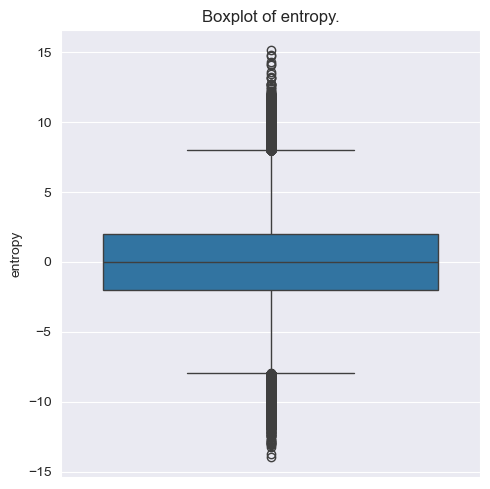

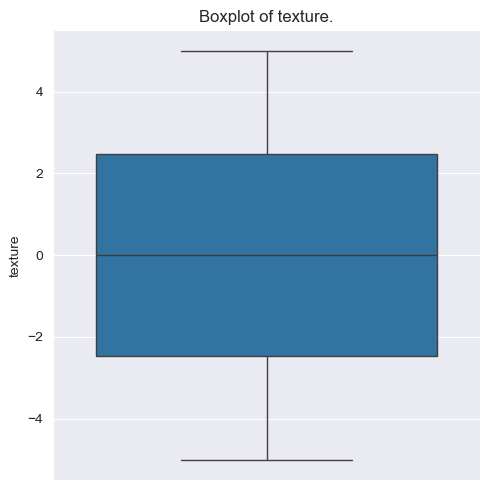

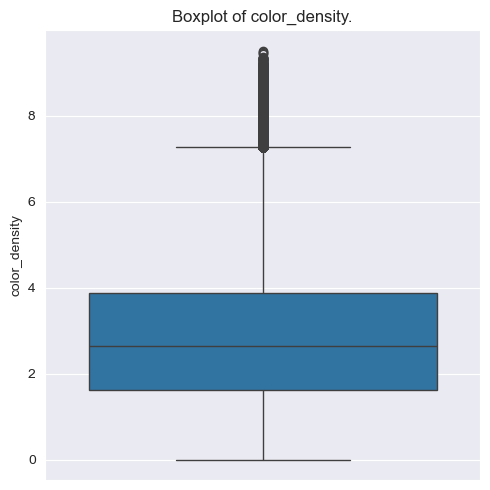

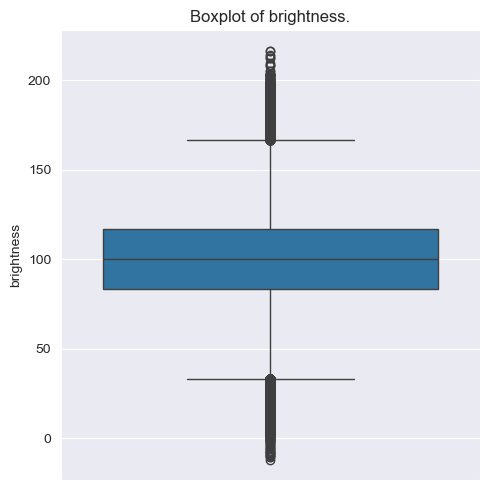

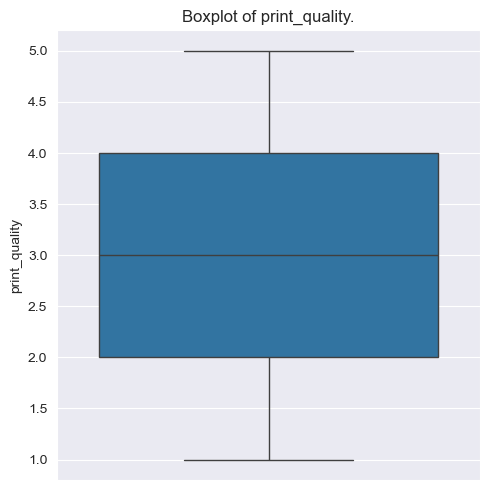

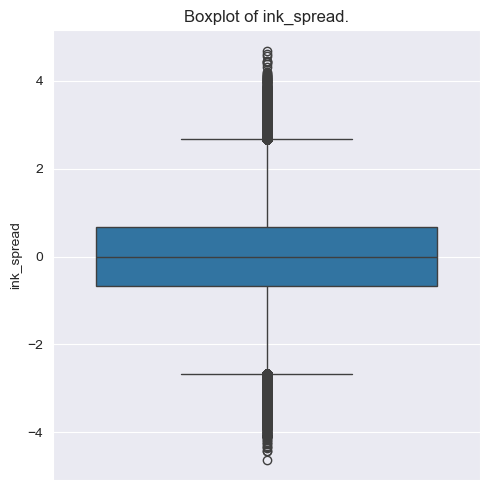

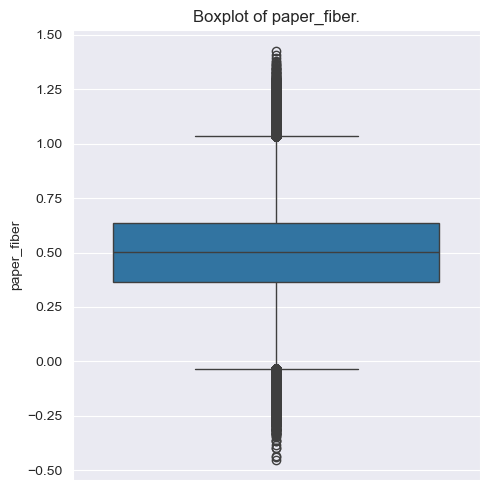

In [27]:
# Removing the counterfeit (target) column from the columns to use in checking for outliers using a list comprehension.
# Checking for outliers should use only the columns with numerical values.
columns_to_use = [x for x in df.columns if x not in ['counterfeit']]

# Plotting boxplots for all features individually using a for loop.
for feature in columns_to_use:
    plt.figure(figsize=(5, 5))
    sns.boxplot(data=df[feature])
    plt.title(f"Boxplot of {feature}.")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

From the Plots, The data has outliers.I therefore use a Random Forest Classifier to Help me Understand which Outliers For What Feature I should Use.

In [30]:
# Creating the Random Forest Model
model = RandomForestClassifier()

# Fitting data to the Model.
model.fit(df[columns_to_use], df['counterfeit'])

importances = pd.Series(model.feature_importances_, index=columns_to_use)
print(importances.sort_values(ascending=False))


color_density    0.426859
entropy          0.269491
variance         0.090093
skewness         0.088550
paper_fiber      0.023656
brightness       0.023624
texture          0.023613
ink_spread       0.023584
kurtosis         0.023562
print_quality    0.006966
dtype: float64


Confirming Whether Smote Worked on oversampling the counterfeit notes 

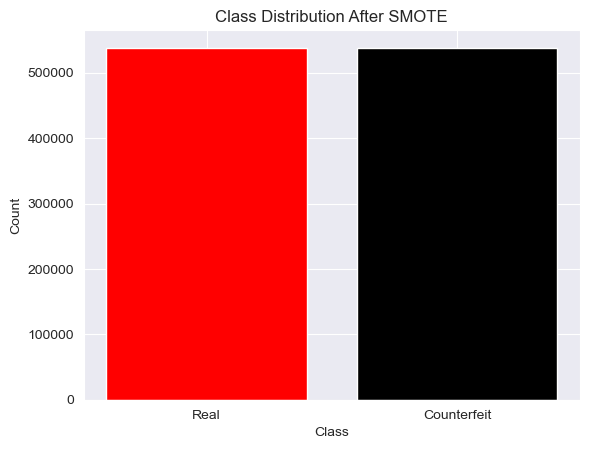

In [84]:
import numpy as np
# Count occurrences of each class
unique, counts = np.unique(Y_sampled, return_counts=True)

# Plot
plt.bar(unique, counts, color=['red', 'black'])
plt.xticks([0, 1], ['Real', 'Counterfeit'])
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


Removing Outliers Using The IQR Method

In [50]:
features = ['color_density', 'entropy','variance','texture', 'brightness','paper_fiber', 'kurtosis', 'ink_spread', 'print_quality','skewness']
def remove_outliers_iqr(df, features):
    df_clean = df.copy()
    for col in features:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

df_clean = remove_outliers_iqr(df, features)


Checking Boxplots To confirm that the Outliers have been Removed.

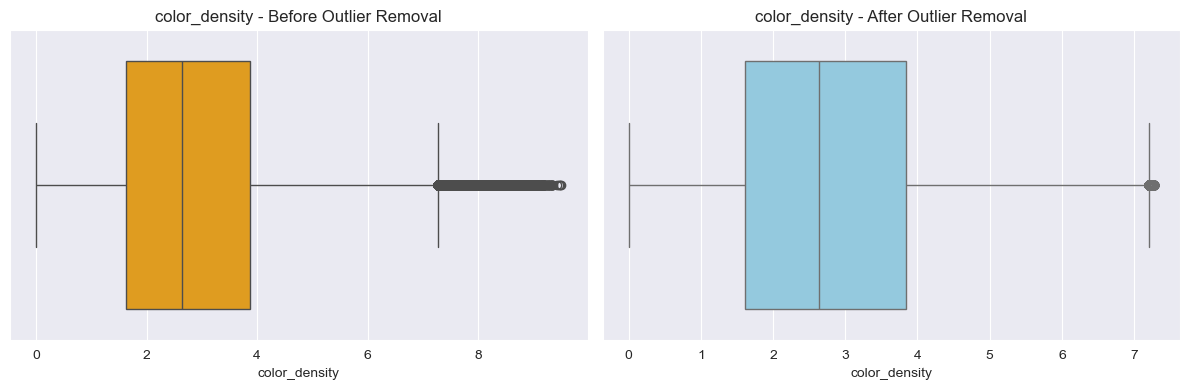

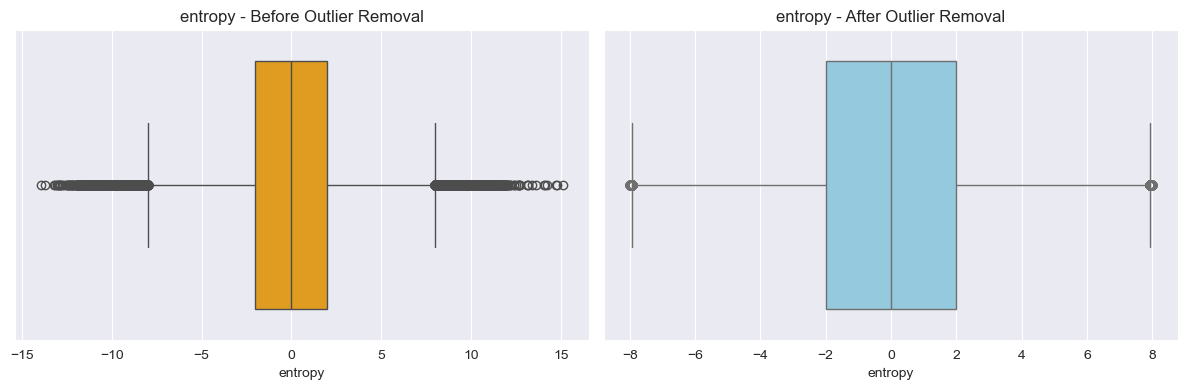

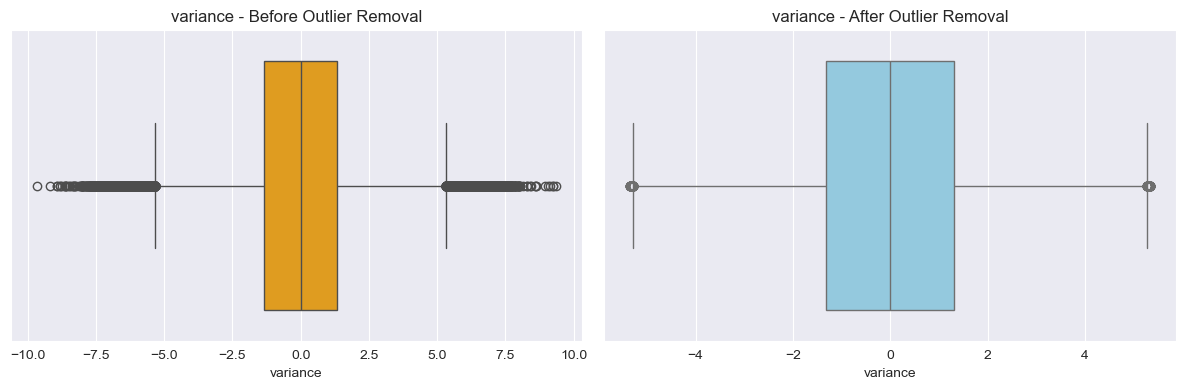

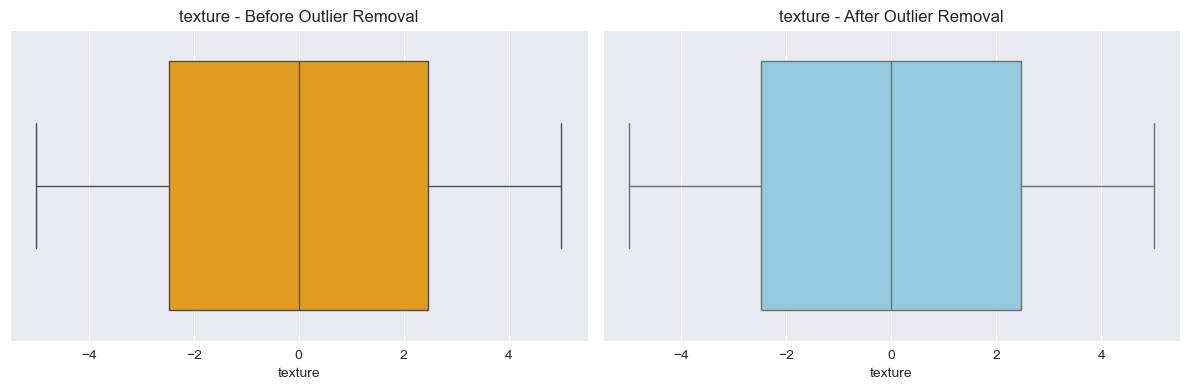

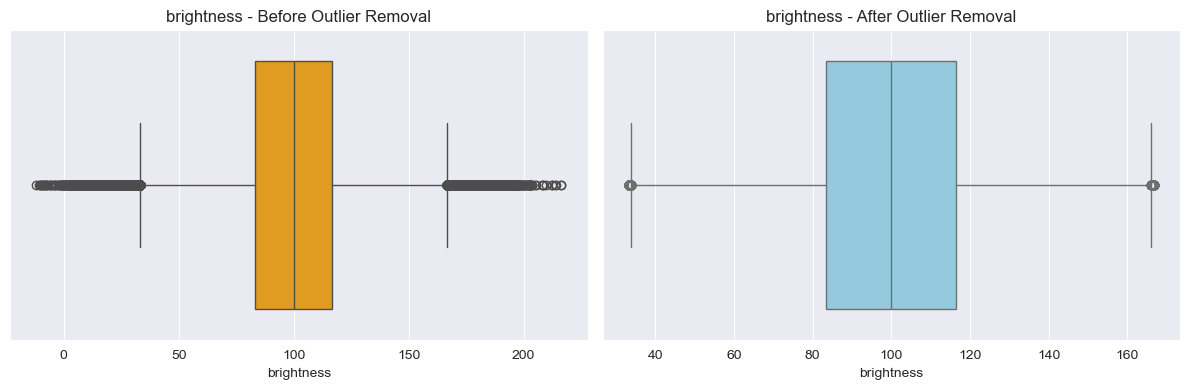

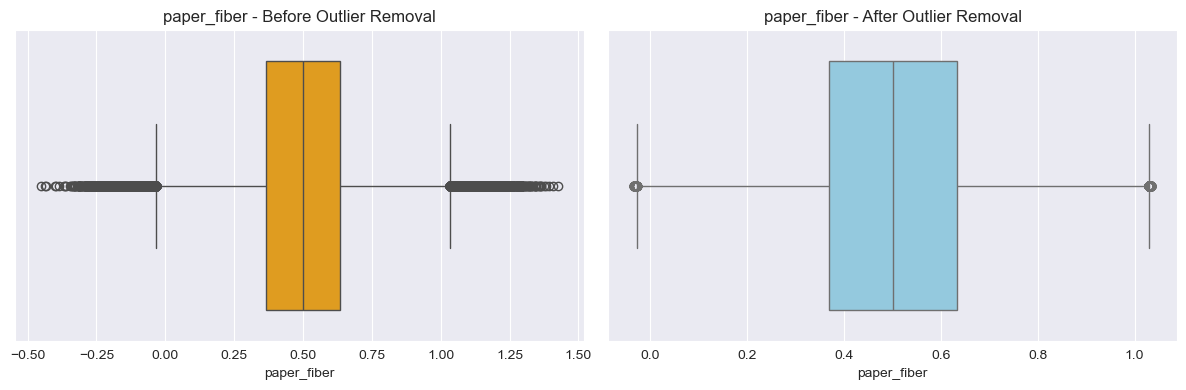

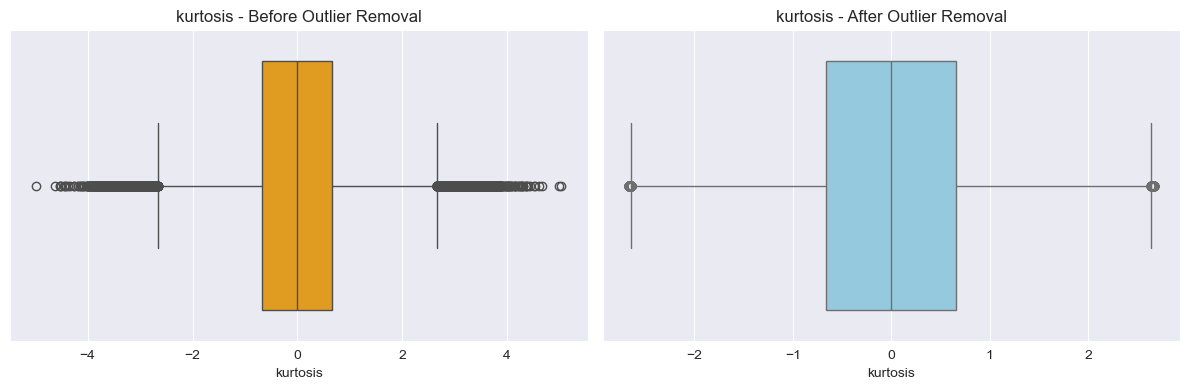

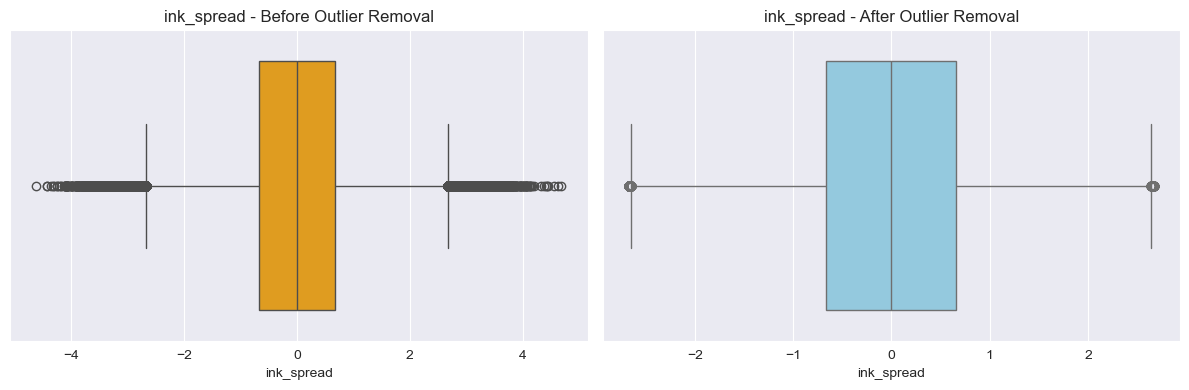

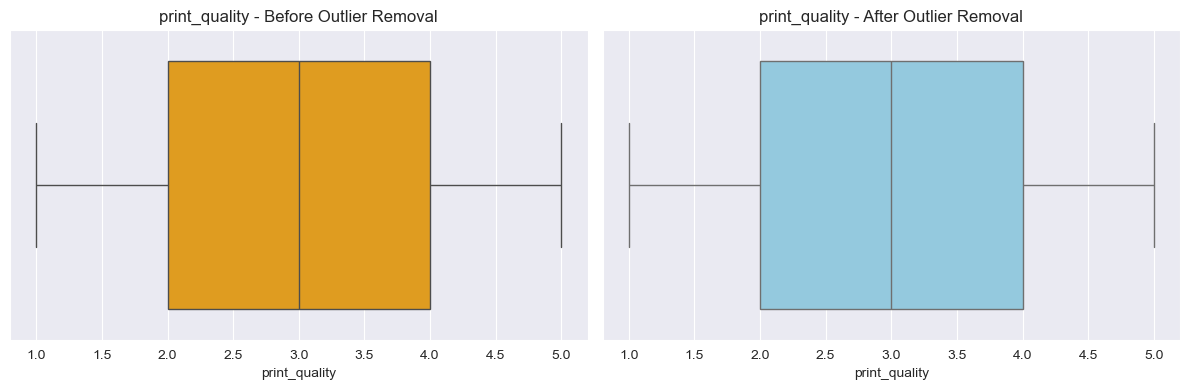

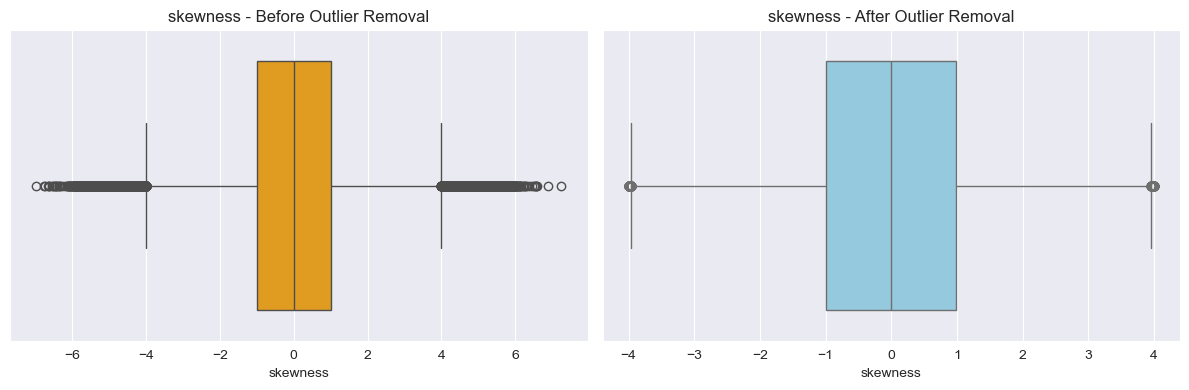

In [53]:
# List of features to plot
features = ['color_density', 'entropy','variance','texture', 'brightness','paper_fiber', 'kurtosis', 'ink_spread', 'print_quality','skewness']

# Plot boxplots side-by-side
for feature in features:
    plt.figure(figsize=(12, 4))

    # Before removal
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[feature], color='orange')
    plt.title(f"{feature} - Before Outlier Removal")

    # After removal
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_clean[feature], color='skyblue')
    plt.title(f"{feature} - After Outlier Removal")

    plt.tight_layout()
    plt.show()

Checking the Shape of Data Before And Removal Of Outliers.

In [57]:
print(f"Before Removal : {df.shape}")
print(f"After Removal  : {df_clean.shape}")

Before Removal : (1000000, 11)
After Removal  : (941285, 11)


From the Output above it is clear that the outliers have been done away with.

Checking For Patterns In The Counterfeit Notes.

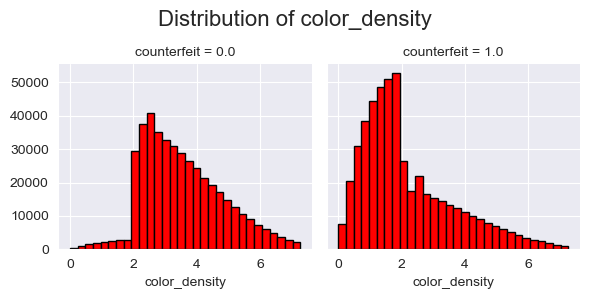

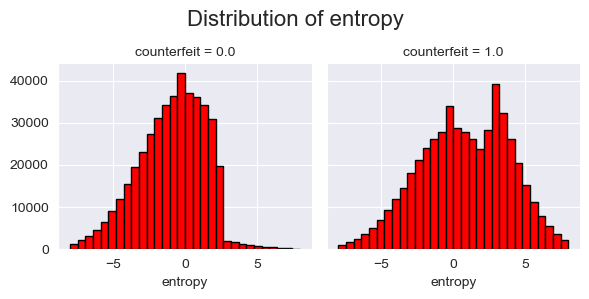

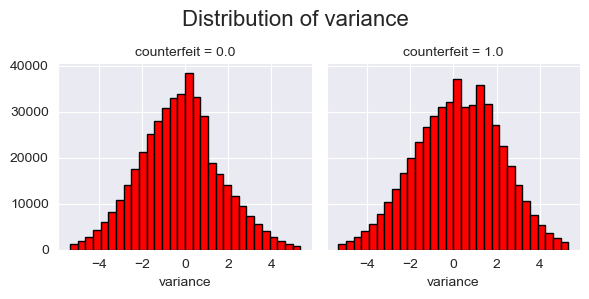

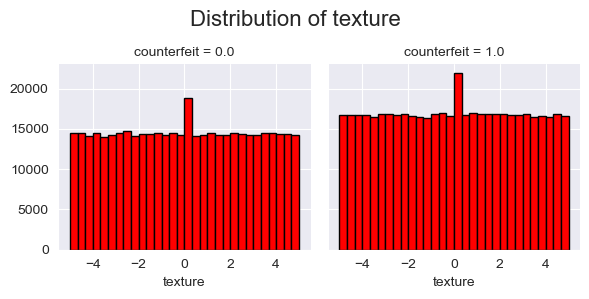

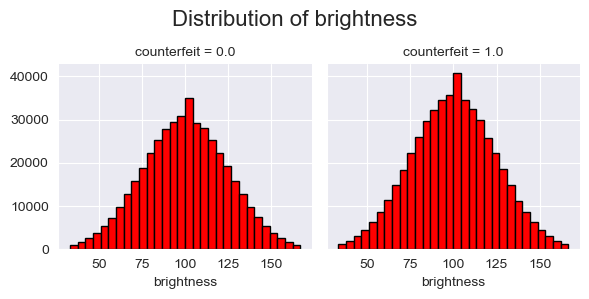

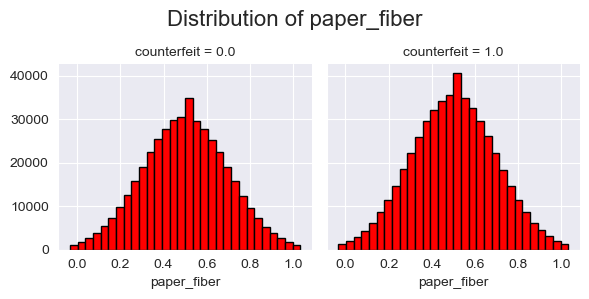

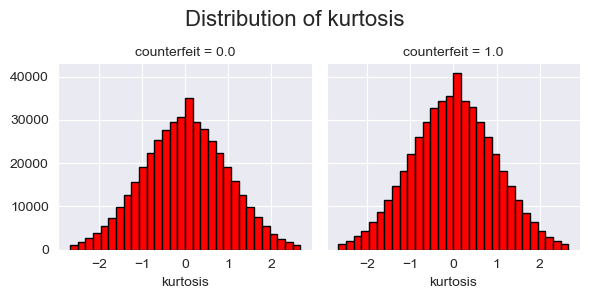

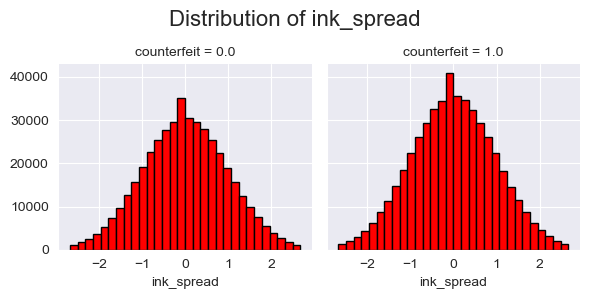

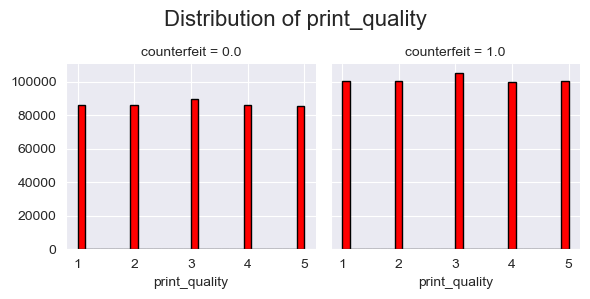

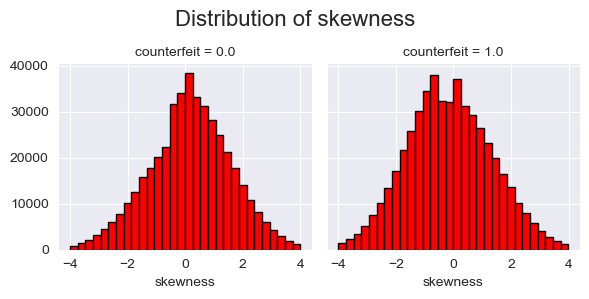

In [82]:
# List of features to plot.
features = ['color_density', 'entropy','variance','texture', 'brightness','paper_fiber', 'kurtosis', 'ink_spread', 'print_quality','skewness']

for feature in features:
    plot = sns.FacetGrid(df_clean, col='counterfeit', margin_titles=True)
    plot.map(plt.hist, feature, color='red', bins=30, edgecolor='black')
    plot.fig.suptitle(f'Distribution of {feature}', fontsize=16)
    plt.subplots_adjust(top=0.8)
    plt.show()

Patterns Extracted From The Plots:
i) In terms of Texture , counterfeit notes have a higher texture value as compared to genuine notes 
ii) In terms of Brightness, counterfeit notes have a higher brightness as their values are higher
iii) Counterfeit notes have higher paper-fiber values compared to genuine notes 
iv) Ink_spread in counterfeit notes is higher compared to genuine notes 
v) In terms of print quality counterfeit notes have a slightly higher count than genuine notes.

Standard Scaling and Modelling.

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler 

# First is to drop the counterfeit column
X = df_clean.drop(columns=['counterfeit'])
Y = df_clean['counterfeit'] # Y is the target variable 

# Split data into train and temp first
X_train, X_temp, Y_train, Y_temp = train_test_split(X_sampled, Y_sampled, test_size=0.4, random_state=42 )

# Split the temp data into validation and test sets 
X_test, X_val, Y_test, Y_val = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Scaling the data to avoid cases of maybe one feature seeming to be more important than another.
scaler = StandardScaler()


# Scaling on the split training data only 
X_train_scaled = scaler.fit_transform(X_train)

# Transforming test data with  the same scaler
X_test_transformed = scaler.transform(X_test)

# Creating Model
Logistic_Regression_Model = LogisticRegression(random_state=42)

# Training And Fitting Model With Data
Logistic_Regression_Model.fit(X_train_scaled, Y_train)

# Making Predictions
Logistic_Predictions = Logistic_Regression_Model.predict(X_test_transformed)

# Classification Report
print(classification_report(Y_test, Logistic_Predictions ))



              precision    recall  f1-score   support

         0.0       0.76      0.75      0.75    107589
         1.0       0.75      0.77      0.76    107721

    accuracy                           0.76    215310
   macro avg       0.76      0.76      0.76    215310
weighted avg       0.76      0.76      0.76    215310



Confusion Matrix Using The Logistic Regression Model

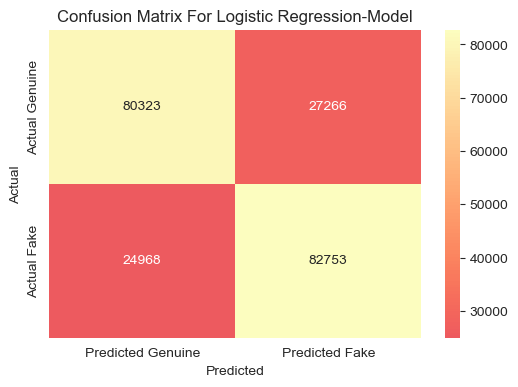

In [74]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay 

# Initializing Matrix
c_matrix1 = confusion_matrix(Y_test, Logistic_Predictions)

# Plotting actual Heatmap Of The Matrix
plt.figure(figsize=(6,4))
sns.heatmap(c_matrix1, cmap='magma', annot=True, xticklabels=['Predicted Genuine', 'Predicted Fake'], 
            yticklabels=['Actual Genuine', 'Actual Fake'], center=0, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix For Logistic Regression-Model")
plt.show()


Prediction Using KNN Model.

In [77]:
# This model Now Uses KNN
from sklearn.neighbors import KNeighborsClassifier

# Initializing Model
knn_model = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='manhattan')

# Training Model
knn_model.fit(X_train_scaled, Y_train)

# Making Predictions
knn_predictions = knn_model.predict(X_test_transformed)

# Classification Report
print(classification_report(Y_test, knn_predictions))

              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87    107589
         1.0       0.89      0.84      0.87    107721

    accuracy                           0.87    215310
   macro avg       0.87      0.87      0.87    215310
weighted avg       0.87      0.87      0.87    215310



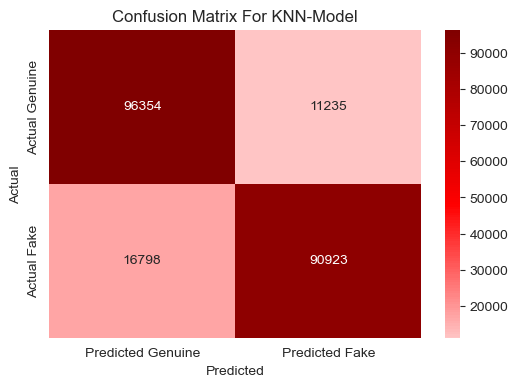

In [79]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay 

# Initializing Matrix
c_matrix = confusion_matrix(Y_test, knn_predictions)

# Plotting actual Heatmap Of The Matrix
plt.figure(figsize=(6,4))
sns.heatmap(c_matrix, cmap='seismic', annot=True, xticklabels=['Predicted Genuine', 'Predicted Fake'], 
            yticklabels=['Actual Genuine', 'Actual Fake'], center=0, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix For KNN-Model")
plt.show()


A comparison between the two models is that Linear regression has a lower accuracy(76%)
while KNN has an accuracy of 87% proving to the most appropriate model for this problem .